In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_drug_trial_df = pd.merge(clinical_trial_data, mouse_drug_data, how='outer', on='Mouse ID')

# Display the data table for preview

list(mouse_drug_data)
list(clinical_trial_data)
mouse_drug_trial_df.head() # ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug']
#mouse_drug_trial_df.get_dtype_counts()

mouse_drug_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_to_treatment = mouse_drug_trial_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
mean_tumor_response_to_treatment = tumor_response_to_treatment.mean()

# Convert to DataFrame
mean_tumor_response_to_treatment_df = mean_tumor_response_to_treatment.reset_index()

# Preview DataFrame
mean_tumor_response_to_treatment_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_standard_errors = tumor_response_to_treatment.sem()

# Convert to DataFrame
tumor_volume_standard_errors_df = pd.DataFrame(tumor_volume_standard_errors)

# Preview DataFrame
tumor_volume_standard_errors_df.reset_index(inplace=True)
tumor_volume_standard_errors_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean_tumor_df = mean_tumor_response_to_treatment_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_mean_tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


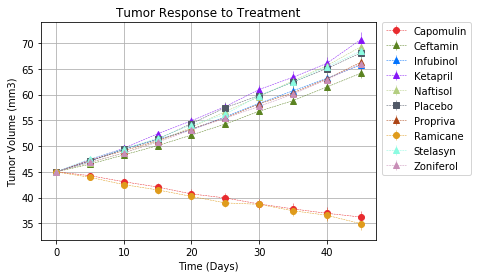

In [5]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','#e82b2f'), #red
                    ('Ceftamin','^','#5b8321'), # dark green
                    ('Infubinol','^','#0273fd'), # blue
                    ('Ketapril','^','#8618f7'), # purple
                    ('Naftisol','^','#b3ce80'), # light green
                    ('Placebo','s','#515967'), # grey 
                    ('Propriva','^','#ad4516'), # brown
                    ('Ramicane','o','#df9b1c'), # light brown/golden
                    ('Stelasyn','^','#8bfbe1'), # teal
                    ('Zoniferol','^','#c88eb7')] # lavander

for drug,marker,color in drug_format_list:
    ste = tumor_volume_standard_errors[drug]
    tumor_response_to_treatment_plt = plt.errorbar(pivot_mean_tumor_df.index, pivot_mean_tumor_df[drug], ste, 
                                                   fmt=marker, ls='--', color=color, linewidth=0.5)

plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')

plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.025)) # show legend outside the plot
plt.grid()

# Save the Figure
plt.savefig("figures/01_tumor_response_to_treatment.png", bbox_inches='tight')

# Show the Figure
plt.show()

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites_df = mouse_drug_trial_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
mean_metastatic_sites = metastatic_sites_df.mean()

# Convert to DataFrame
mean_metastatic_sites_df = pd.DataFrame(mean_metastatic_sites)

# Preview DataFrame
mean_metastatic_sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sites_standard_errors = metastatic_sites_df.sem()

# Convert to DataFrame
metastatic_sites_standard_errors_df = pd.DataFrame(metastatic_sites_standard_errors)

# Preview DataFrame
metastatic_sites_standard_errors_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_sites_df.reset_index(inplace=True)
pivot_mean_metastatic_sites_df = mean_metastatic_sites_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
pivot_mean_metastatic_sites_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


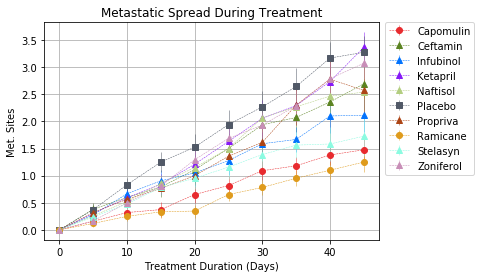

In [10]:
# Generate the Plot (with Error Bars)
# same as before legend for all drugs
drug_format_list = [('Capomulin','o','#e82b2f'), #red
                    ('Ceftamin','^','#5b8321'), # dark green
                    ('Infubinol','^','#0273fd'), # blue
                    ('Ketapril','^','#8618f7'), # purple
                    ('Naftisol','^','#b3ce80'), # light green
                    ('Placebo','s','#515967'), # grey 
                    ('Propriva','^','#ad4516'), # brown
                    ('Ramicane','o','#df9b1c'), # light brown/golden
                    ('Stelasyn','^','#8bfbe1'), # teal
                    ('Zoniferol','^','#c88eb7')] # lavander

metastatic_sites_standard_errors_df.reset_index()
for drug,marker,color in drug_format_list:
    ste = metastatic_sites_standard_errors[drug]
    metastasis_spread_treatment_plt = plt.errorbar(pivot_mean_metastatic_sites_df.index,
                                                   pivot_mean_metastatic_sites_df[drug], ste, 
                                                   fmt=marker, ls='--', color=color, linewidth=0.5)

# Show the Figure
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')

plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.025))
plt.grid()

# Save the Figure
plt.savefig("figures/02_metastatic_spread_during_treatment.png", bbox_inches='tight')


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_by_drugs = mouse_drug_trial_df.groupby(['Drug','Timepoint'])['Mouse ID']
mice_count_by_drugs = mice_count_by_drugs.nunique()
mice_count_by_drugs_df = pd.DataFrame(mice_count_by_drugs)

# Convert to DataFrame
mice_count_by_drugs_df.reset_index(inplace=True)
mice_count_by_drugs_df=mice_count_by_drugs_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
mice_count_by_drugs_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice_count_df = mice_count_by_drugs_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
pivot_mice_count_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


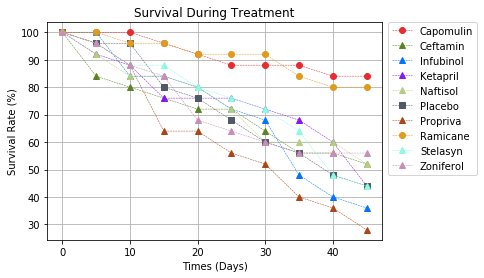

In [13]:
# Generate the Plot (Accounting for percentages)
for drug,marker,color in drug_format_list:
    total_mouse = pivot_mice_count_df[drug][0]
    survival_rate = (pivot_mice_count_df[drug]/total_mouse) * 100
    survival_during_treatment_plt = plt.plot(pivot_mice_count_df.index, survival_rate, 
                                             marker=marker, ls='--', color=color, linewidth=0.5)

# Show the Figure
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')

plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.025))
plt.grid()

# Save the Figure
plt.savefig("figures/03_survival_during_treatment.png", bbox_inches='tight')

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percentage_change_for_drug = (pivot_mean_tumor_df.iloc[-1]/(pivot_mean_tumor_df.iloc[0])-1)*100

# Display the data to confirm
percentage_change_for_drug #pandas.core.series.Series

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

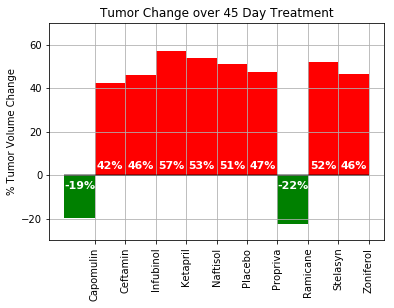

In [15]:
# Store all Relevant Percent Changes into a Tuple
drug_list = list(percentage_change_for_drug.index) # list of drugs
drug_change = tuple(zip(drug_list, percentage_change_for_drug))

# Splice the data between passing and failing drugs
passing_drugs = percentage_change_for_drug < 0

# Orient widths. Add labels, tick marks, etc. 
change_list = [(percentage_change_for_drug[durg])for durg in drug_list]

drug_change_plt = plt.bar(drug_list, change_list, width=-1, color=passing_drugs.map({True:'g',False:'r'}), 
                          align="edge", tick_label = drug_list)

plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')
plt.xticks(rotation=90)
plt.grid()
plt.hlines(0, -1, 9, alpha=0.5)

# Use functions to label the percentages of changes

def autolabel(rects):
    # pass bar plot to assign values onto bar plot
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            position = 2
        else:
            position = -7
        plt.text(rect.get_x()+rect.get_width()/2., position, '%d'%int(height)+'%', 
                 color='white', fontsize=11, weight='bold', ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(drug_change_plt)

# Save the Figure
plt.savefig("figures/04_tumor_percent_change_after_treatment.png")

# Show the Figure
plt.show()